In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [93]:
def metrics(test, predict):
    MSE = mean_squared_error(test, predict)
    RMSE = np.sqrt(mean_squared_error(test, predict))
    MAE = mean_absolute_error(test, predict)
    R2_score = (r2_score(test, predict) * 100).round(3)
    print(f"MSE: {MSE}, RMSE: {RMSE}, MAE: {MAE}, R2: {R2_score}")
    return [MSE, RMSE, MAE, R2_score]

In [41]:
def lin_pred(predict, model):
    sns.set_palette("pastel")
    fig, ax = plt.subplots()
    ax.scatter(y_test, predict)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_xlabel('Actual price, UAH')
    ax.set_ylabel('Predicted price, UAH')
    plt.title(model)
    plt.show()

In [2]:
data = pd.read_csv('melb_data.csv')
pd.set_option('display.max_columns', None)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [4]:
data.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [5]:
data.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [6]:
clean_data = data[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Landsize', 'Propertycount', 'Type', 'Method', 'Regionname']]
clean_data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
0,2,1480000.0,2.5,2.0,1.0,1.0,NaN,NaN,202.0,4019.0,h,S,Northern Metropolitan
1,2,1035000.0,2.5,2.0,1.0,0.0,79.0,1900.0,156.0,4019.0,h,S,Northern Metropolitan
2,3,1465000.0,2.5,3.0,2.0,0.0,150.0,1900.0,134.0,4019.0,h,SP,Northern Metropolitan
3,3,850000.0,2.5,3.0,2.0,1.0,NaN,NaN,94.0,4019.0,h,PI,Northern Metropolitan
4,4,1600000.0,2.5,3.0,1.0,2.0,142.0,2014.0,120.0,4019.0,h,VB,Northern Metropolitan


In [7]:
encoder = LabelEncoder()

In [8]:
clean_data.Type = encoder.fit_transform(clean_data.Type)

In [9]:
clean_data.Method = encoder.fit_transform(clean_data.Method)

In [10]:
clean_data.Regionname = encoder.fit_transform(clean_data.Regionname)

In [11]:
clean_data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
0,2,1480000.0,2.5,2.0,1.0,1.0,NaN,NaN,202.0,4019.0,0,1,2
1,2,1035000.0,2.5,2.0,1.0,0.0,79.0,1900.0,156.0,4019.0,0,1,2
2,3,1465000.0,2.5,3.0,2.0,0.0,150.0,1900.0,134.0,4019.0,0,3,2
3,3,850000.0,2.5,3.0,2.0,1.0,NaN,NaN,94.0,4019.0,0,0,2
4,4,1600000.0,2.5,3.0,1.0,2.0,142.0,2014.0,120.0,4019.0,0,4,2


In [12]:
clean_data.shape

(13580, 13)

In [13]:
clean_data.isna().sum()

Rooms               0
Price               0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
BuildingArea     6450
YearBuilt        5375
Landsize            0
Propertycount       0
Type                0
Method              0
Regionname          0
dtype: int64

In [14]:
clean_data['Car'] = clean_data['Car'].fillna(2)

In [15]:
clean_data.describe().round()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
count,13580.0,13580.0,13580.0,13580.0,13580.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0,13580.0,13580.0
mean,3.0,1075684.0,10.0,3.0,2.0,2.0,152.0,1965.0,558.0,7454.0,1.0,1.0,4.0
std,1.0,639311.0,6.0,1.0,1.0,1.0,541.0,37.0,3991.0,4379.0,1.0,1.0,2.0
min,1.0,85000.0,0.0,0.0,0.0,0.0,0.0,1196.0,0.0,249.0,0.0,0.0,0.0
25%,2.0,650000.0,6.0,2.0,1.0,1.0,93.0,1940.0,177.0,4380.0,0.0,1.0,2.0
50%,3.0,903000.0,9.0,3.0,1.0,2.0,126.0,1970.0,440.0,6555.0,0.0,1.0,5.0
75%,3.0,1330000.0,13.0,3.0,2.0,2.0,174.0,1999.0,651.0,10331.0,1.0,1.0,5.0
max,10.0,9000000.0,48.0,20.0,8.0,10.0,44515.0,2018.0,433014.0,21650.0,2.0,4.0,7.0


In [16]:
clean_data.loc[clean_data.BuildingArea >= 1000]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
1368,3,1053000.0,5.2,3.0,1.0,1.0,1041.0,1925.0,343.0,11918.0,0,1,2
1484,4,1280000.0,11.8,4.0,1.0,2.0,6791.0,NaN,732.0,4480.0,0,1,0
1588,5,2608000.0,7.8,5.0,2.0,4.0,3112.0,1920.0,730.0,8920.0,0,1,5
2234,2,741000.0,8.5,3.0,1.0,1.0,1561.0,1966.0,0.0,4898.0,2,1,5
2560,2,930000.0,3.5,2.0,3.0,0.0,3558.0,NaN,2778.0,6244.0,1,1,2
2830,2,600000.0,9.2,2.0,1.0,1.0,1143.0,NaN,0.0,10412.0,1,4,5
3640,5,1975000.0,5.6,3.0,2.0,1.0,1022.0,1890.0,531.0,10331.0,0,1,5
13245,5,1355000.0,48.1,5.0,3.0,5.0,44515.0,NaN,44500.0,849.0,0,1,3


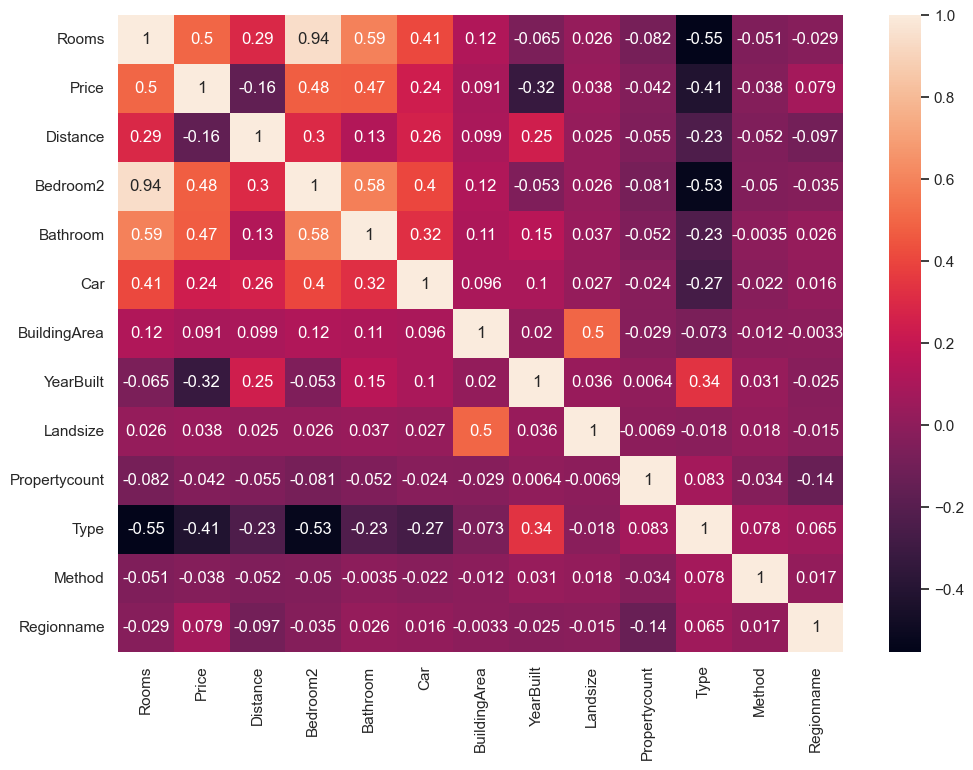

In [20]:
sns.heatmap(clean_data.corr(), annot = True)
sns.set(rc={'figure.figsize':(20, 20)})

In [21]:
clean_data = clean_data.loc[clean_data.BuildingArea != 0]

In [22]:
clean_data = clean_data.drop(['BuildingArea'], axis = 1)

In [23]:
imputer = KNNImputer(n_neighbors=3)

In [24]:
imputer.fit(clean_data)

KNNImputer(n_neighbors=3)

In [25]:
data_tranform = imputer.transform(clean_data)

In [26]:
data_tranform = pd.DataFrame(data_tranform)

In [27]:
data_tranform.columns = clean_data.columns

In [28]:
data_tranform.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
0,2.0,1480000.0,2.5,2.0,1.0,1.0,1935.0,202.0,4019.0,0.0,1.0,2.0
1,2.0,1035000.0,2.5,2.0,1.0,0.0,1900.0,156.0,4019.0,0.0,1.0,2.0
2,3.0,1465000.0,2.5,3.0,2.0,0.0,1900.0,134.0,4019.0,0.0,3.0,2.0
3,3.0,850000.0,2.5,3.0,2.0,1.0,1959.0,94.0,4019.0,0.0,0.0,2.0
4,4.0,1600000.0,2.5,3.0,1.0,2.0,2014.0,120.0,4019.0,0.0,4.0,2.0


In [29]:
data_tranform.isna().sum()

Rooms            0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
YearBuilt        0
Landsize         0
Propertycount    0
Type             0
Method           0
Regionname       0
dtype: int64

In [30]:
data_tranform.describe().round()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,YearBuilt,Landsize,Propertycount,Type,Method,Regionname
count,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0,13563.0
mean,3.0,1075216.0,10.0,3.0,2.0,2.0,1964.0,558.0,7454.0,1.0,1.0,4.0
std,1.0,638812.0,6.0,1.0,1.0,1.0,33.0,3993.0,4380.0,1.0,1.0,2.0
min,1.0,85000.0,0.0,0.0,0.0,0.0,1196.0,0.0,249.0,0.0,0.0,0.0
25%,2.0,650000.0,6.0,2.0,1.0,1.0,1947.0,176.0,4380.0,0.0,1.0,2.0
50%,3.0,903000.0,9.0,3.0,1.0,2.0,1968.0,440.0,6543.0,0.0,1.0,5.0
75%,3.0,1330000.0,13.0,3.0,2.0,2.0,1988.0,651.0,10331.0,1.0,1.0,5.0
max,10.0,9000000.0,48.0,20.0,8.0,10.0,2018.0,433014.0,21650.0,2.0,4.0,7.0


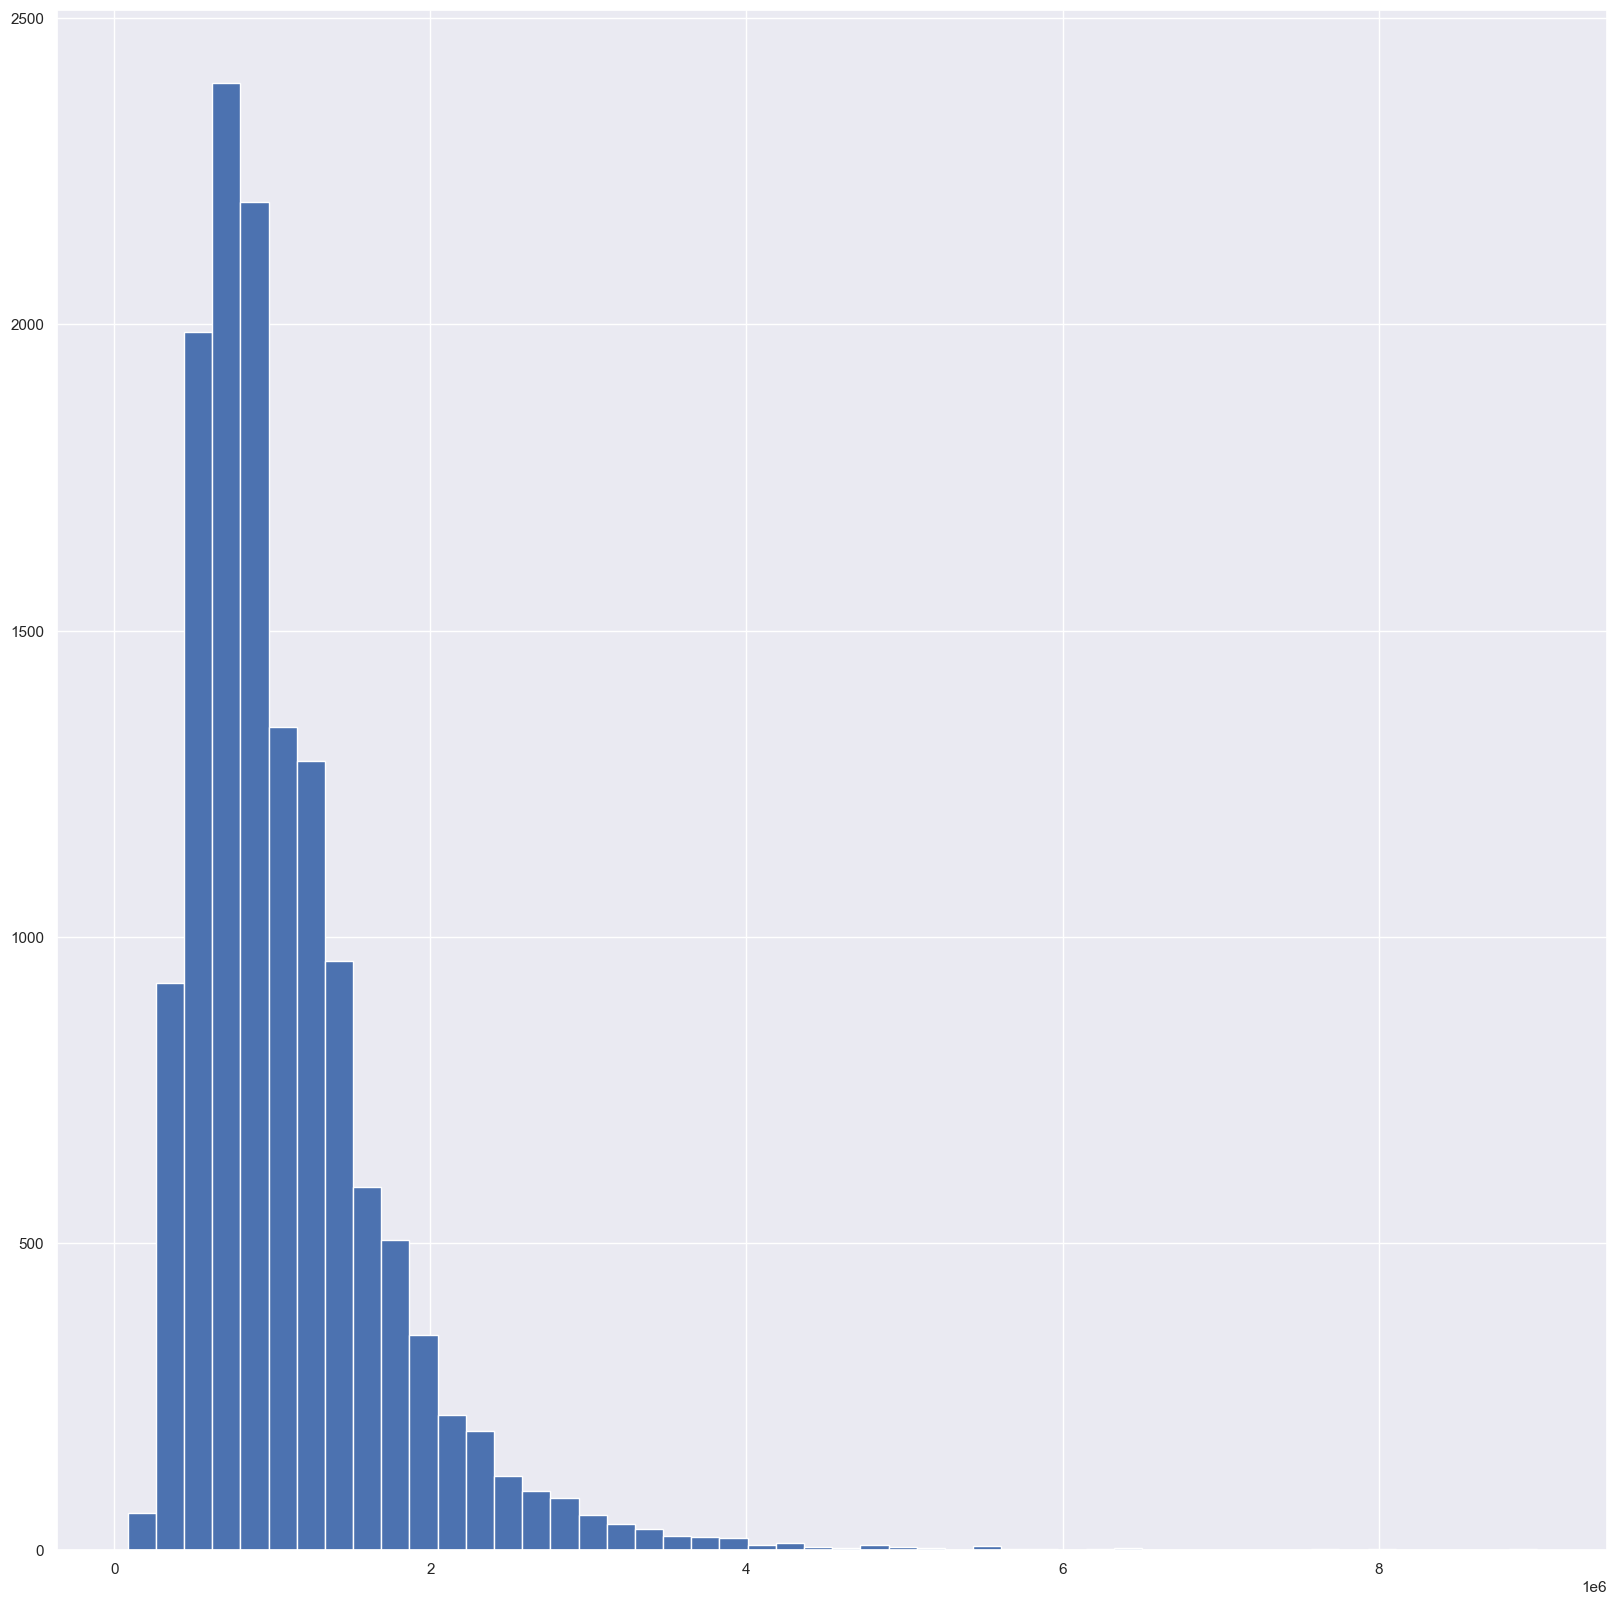

In [33]:
data_tranform['Price'].hist(bins = 50)
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot: >

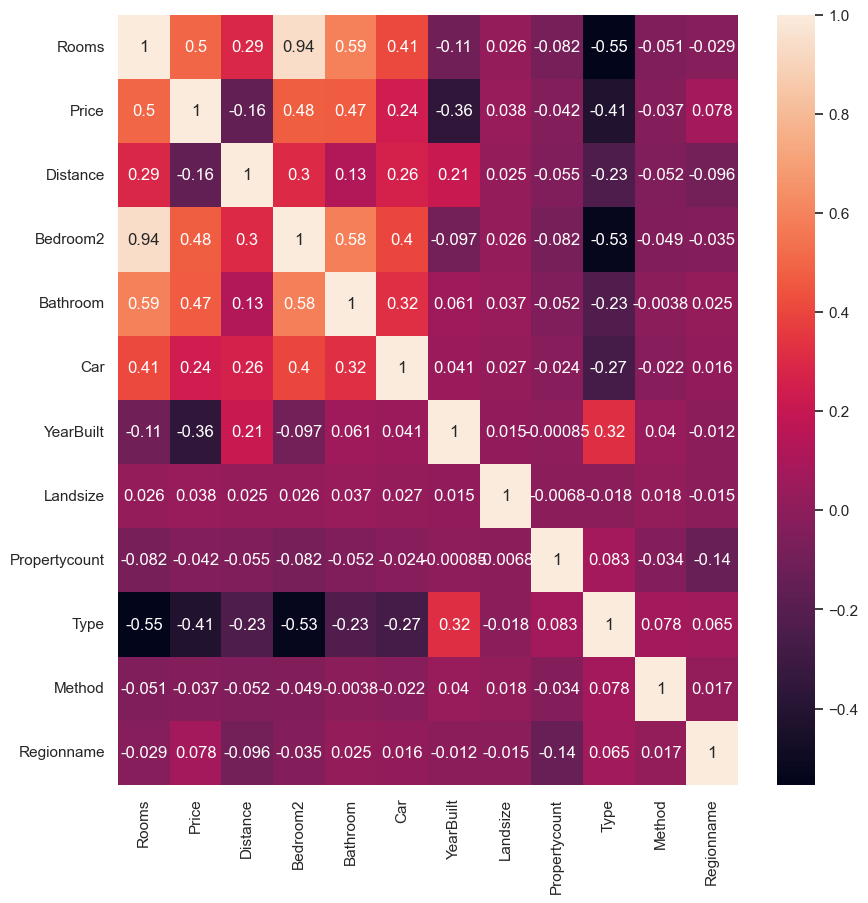

In [34]:
sns.heatmap(data_tranform.corr(), annot = True)

In [35]:
data_tranform = data_tranform.drop(['Bedroom2'], axis = 1)

In [36]:
y = data_tranform['Price']
X = data_tranform.drop(['Price'], axis = 1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [42]:
linear = LinearRegression()

In [43]:
linear.fit(x_train, y_train)

LinearRegression()

In [44]:
lin_pred = linear.predict(x_test)

In [45]:
metrics(y_test, lin_pred)

MSE: 193559088635.28366, RMSE: 439953.50735649746, MAE: 305131.6761970494, R2: 51.787


[193559088635.28366, 439953.50735649746, 305131.6761970494, 51.787]

In [48]:
poly = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])

In [49]:
poly.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [50]:
poly_pred = poly.predict(x_test)

In [51]:
metrics(y_test, poly_pred)

MSE: 173114626245.5932, RMSE: 416070.4582707035, MAE: 280305.95406108914, R2: 56.879


[173114626245.5932, 416070.4582707035, 280305.95406108914, 56.879]

In [53]:
depth_score = []
for i in range(1, 15):
    model = DecisionTreeRegressor(max_depth=i)
    score = cross_val_score(model, x_train, y_train, cv = 10)
    depth_score.append(score.mean())
    
depth_score_all = zip(depth_score, range(1, 15))
score, best_depth = max(depth_score_all)

Text(0, 0.5, 'score')

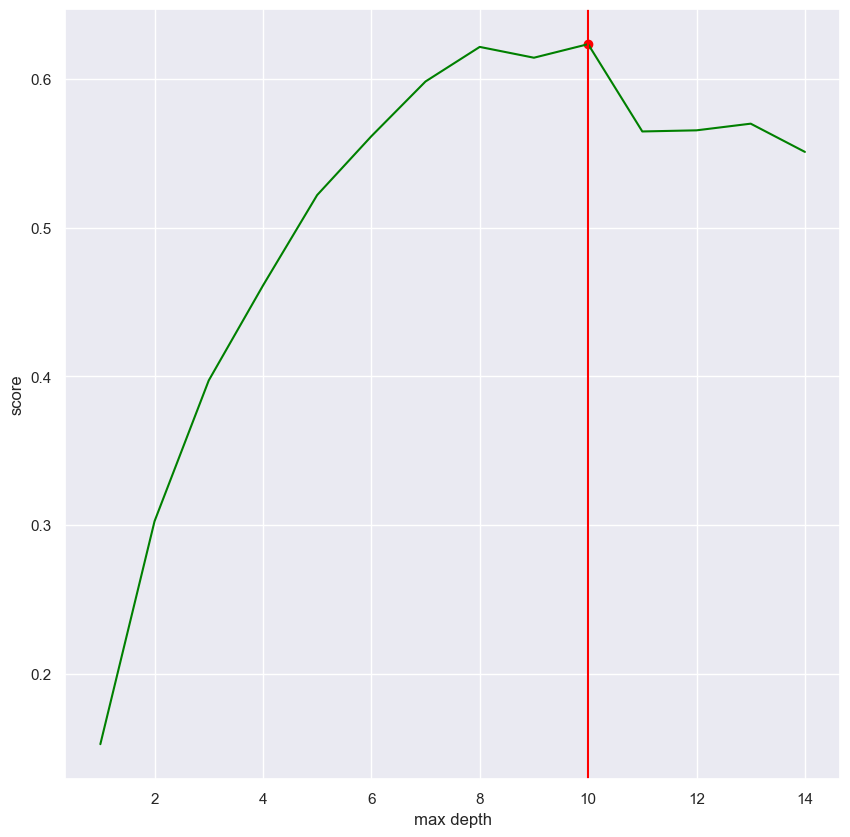

In [54]:
plt.plot(range(1, 15), depth_score, color = 'green')
plt.scatter(best_depth, score, color = 'red')
plt.axvline(x = best_depth, color = 'red')
plt.xlabel('max depth')
plt.ylabel('score')

In [55]:
leafs_score = []
for i in range(1, 10):
    model = DecisionTreeRegressor(max_depth=best_depth, min_samples_leaf=i)
    score = cross_val_score(model, x_train, y_train)
    leafs_score.append(score.mean())
leafs_score_all = zip(leafs_score, range(1, 10))
score, min_leaf = max(leafs_score_all)

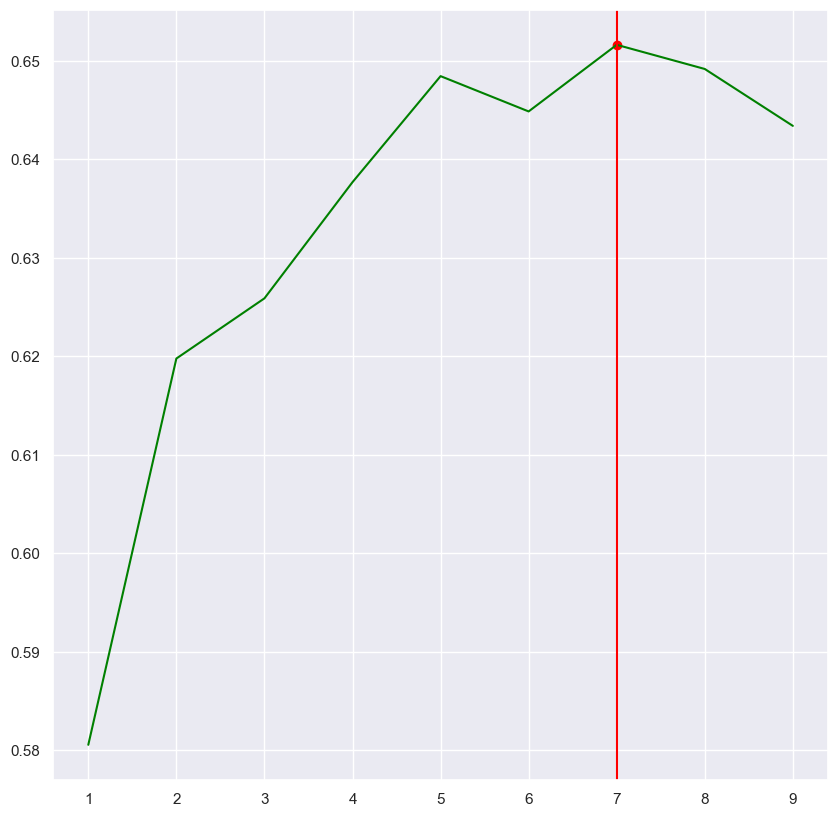

In [56]:
plt.plot(range(1, 10), leafs_score, color = 'green')
plt.scatter(min_leaf, score, color = 'red')
plt.axvline(x = min_leaf, color = 'red')

In [57]:
tree_model = DecisionTreeRegressor(max_depth=best_depth, min_samples_leaf=min_leaf)

In [58]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=7)

In [62]:
tree_predict = tree_model.predict(x_test)

In [60]:
importances = tree_model.feature_importances_
importances

array([0.22859662, 0.21221913, 0.05385722, 0.00389735, 0.08258071,
       0.10815497, 0.03813926, 0.10769357, 0.00243061, 0.16243056])

In [61]:
X.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'YearBuilt', 'Landsize',
       'Propertycount', 'Type', 'Method', 'Regionname'],
      dtype='object')

In [63]:
metrics(y_test, tree_predict)

MSE: 115273306654.41606, RMSE: 339519.22869613155, MAE: 214746.5330920103, R2: 71.287


[115273306654.41606, 339519.22869613155, 214746.5330920103, 71.287]

In [67]:
forest_score = []
for i in range(1, 20):
    model = RandomForestRegressor(max_depth=i, random_state=42, n_estimators=200)
    score = cross_val_score(model, x_train, y_train)
    forest_score.append(score.mean())

In [68]:
forest_score_zip = zip(forest_score, range(1, 20))
best_score, max_depth = max(forest_score_zip)

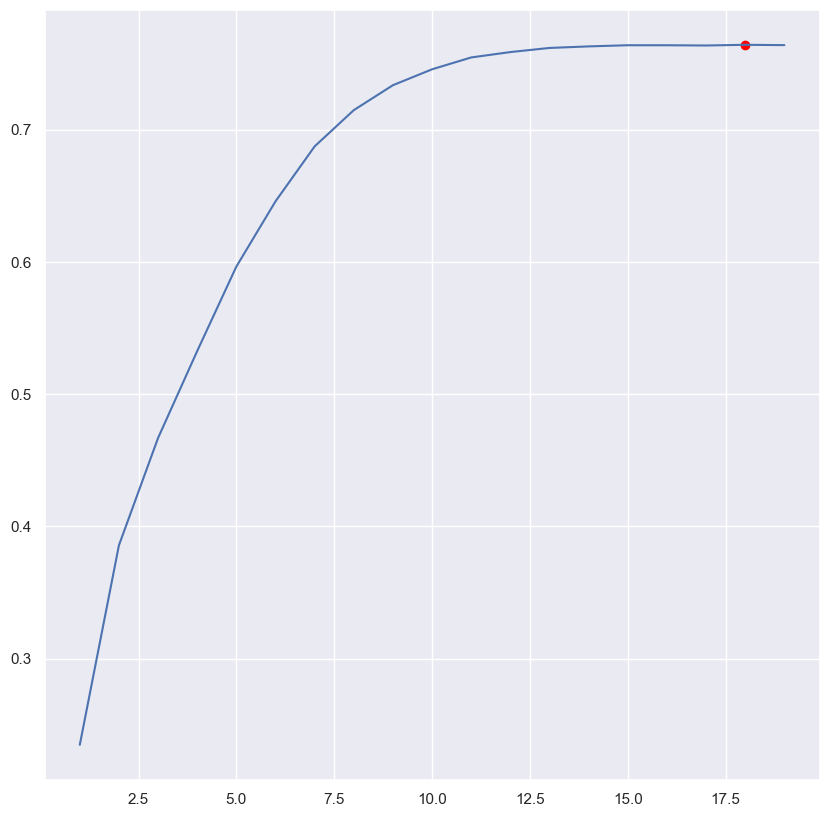

In [71]:
plt.plot(range(1, 20), forest_score)
plt.scatter(max_depth, best_score, color = 'red')

In [72]:
forest_score = []
for i in range(1, 20):
    model = RandomForestRegressor(max_depth=max_depth, min_samples_leaf = i, random_state=42, n_estimators=200)
    score = cross_val_score(model, x_train, y_train)
    forest_score.append(score.mean())
forest_score_zip = zip(forest_score, range(1, 20))
best_score, min_leaf = max(forest_score_zip)

In [73]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=max_depth, min_samples_leaf=min_leaf)

In [74]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=2, random_state=42)

In [75]:
rf.feature_importances_

array([0.15436671, 0.17815525, 0.08645711, 0.01398161, 0.15448103,
       0.13728176, 0.05483481, 0.07829846, 0.01108583, 0.13105743])

In [76]:
predict_rf = rf.predict(x_test)

In [77]:
metrics(y_test, predict_rf)

MSE: 81441603341.6013, RMSE: 285379.75285853987, MAE: 178219.0439334788, R2: 79.714


[81441603341.6013, 285379.75285853987, 178219.0439334788, 79.714]

In [83]:
score_neigb = []
for i in range(2, 20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_n = model.predict(x_test)
    score = r2_score(y_test, pred_n)
    score_neigb.append(score)

In [84]:
max_score = max(score_neigb)
n_best = score_neigb.index(max_score)

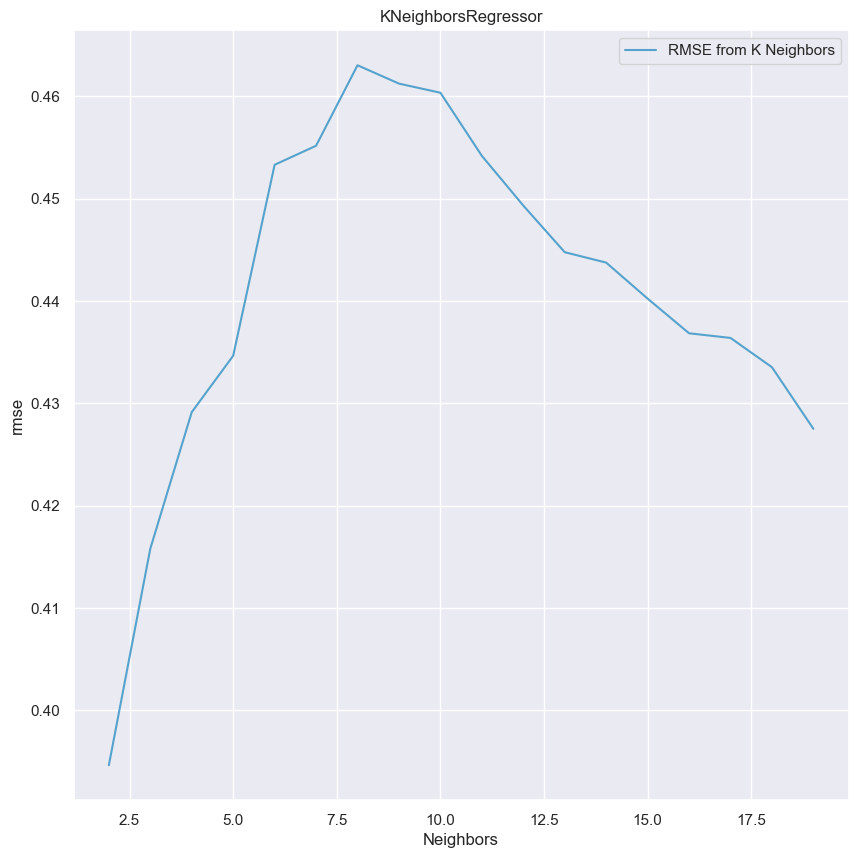

In [86]:
plt.title(f"KNeighborsRegressor")
plt.xlabel('Neighbors')
plt.ylabel('rmse')
sns.set_palette("icefire")
plt.plot(range(2, 20), score_neigb, label = 'RMSE from K Neighbors')
plt.legend()
plt.show()

In [87]:
max_score

0.46302705612229855

In [99]:
    score_depth_leaf = []
    plot_score = []
    plot_depth = []
    for i in range(1, 10):
        for j in range(1, 10):
            model_res = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth= i, min_samples_leaf= j)
            score = cross_val_score(model_res, x_train, y_train, cv = 10)
            score_depth_leaf.append((score.mean(), i, j))
            plot_depth.append(i)
            plot_score.append(score.mean())

    def take_score(elem: tuple):
        return elem[0]

    max_score = max(score_depth_leaf, key=take_score)
    best_score, best_depth, min_leaf = max_score

In [100]:
xgb = GradientBoostingRegressor(max_depth=best_depth, min_samples_leaf=min_leaf, n_estimators=200)

In [101]:
xgb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=8, n_estimators=200)

In [102]:
grad_pred = xgb.predict(x_test)

In [103]:
metrics(y_test, grad_pred)

MSE: 73303660377.44319, RMSE: 270746.4872855107, MAE: 172235.225631413, R2: 81.741


[73303660377.44319, 270746.4872855107, 172235.225631413, 81.741]